In [4]:
from sklearn.decomposition import PCA
from glob import glob
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyUserWarning
warnings.filterwarnings("ignore", category=AstropyUserWarning)
%matplotlib inline

In [5]:
H_dict = np.load("local_histogram_fromdrive.npz")

In [6]:
H_array = H_dict["H_array"]

In [7]:
pointings_avg = H_dict["pointings_avg"]

In [8]:
bin_number = int(np.sqrt(H_array.shape[1]))

In [9]:
pca = PCA(n_components=10, whiten=False)
pca.fit(H_array)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_.shape

(10, 40000)

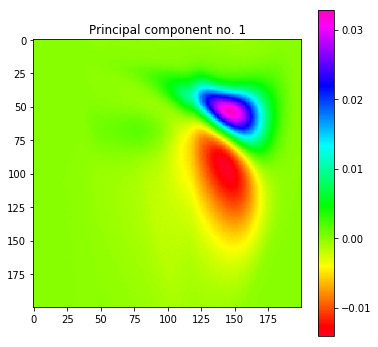

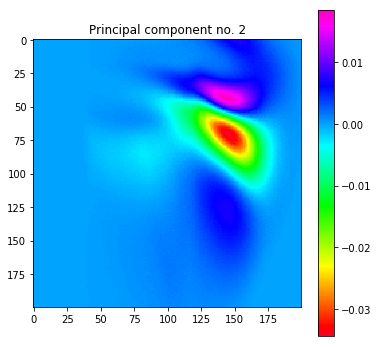

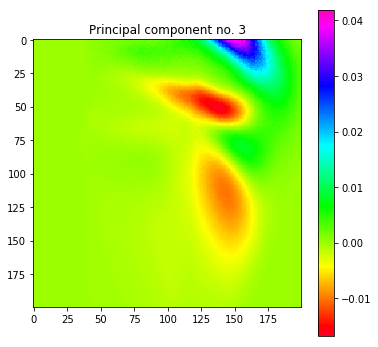

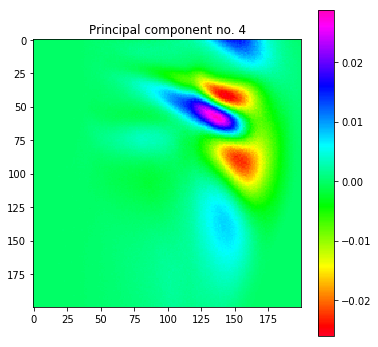

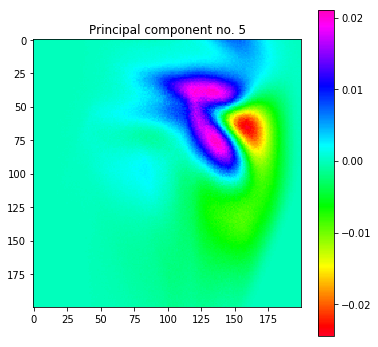

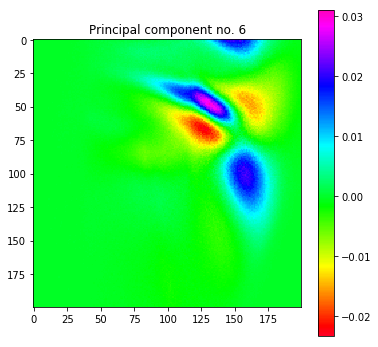

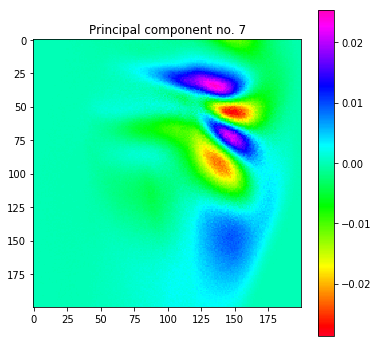

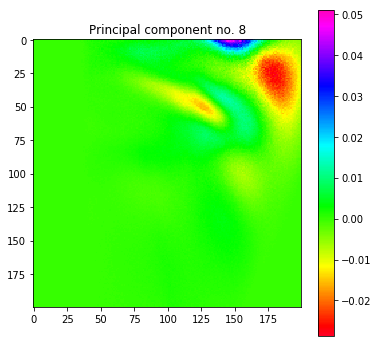

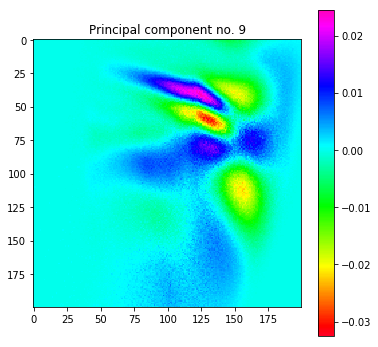

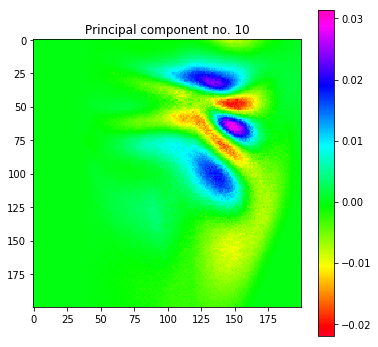

In [12]:
savename = "pc_plots_drive_%d_%d.png"
blocknumber = 10
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    cax = ax.imshow(pc, cmap='gist_rainbow')
    ax.set_title('Principal component no. %d' %(i+1) )
    cbar = fig.colorbar(cax)
    fig.savefig(savename % (blocknumber, i))

In [13]:
H_small = pca.fit_transform(H_array)

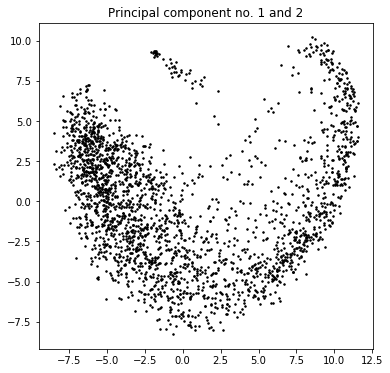

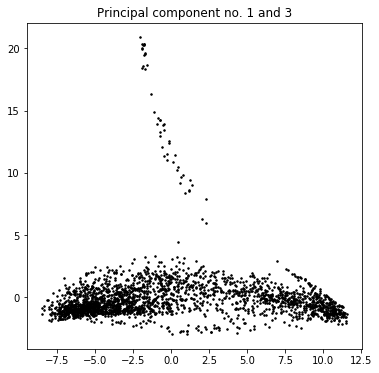

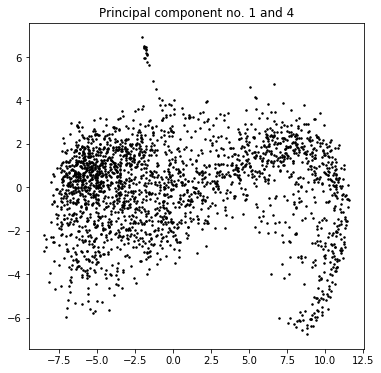

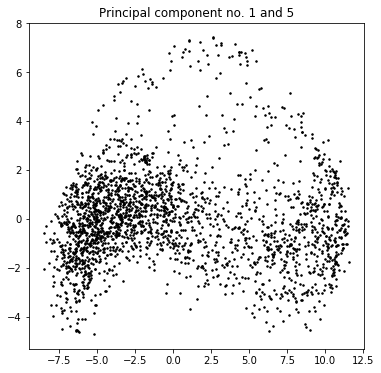

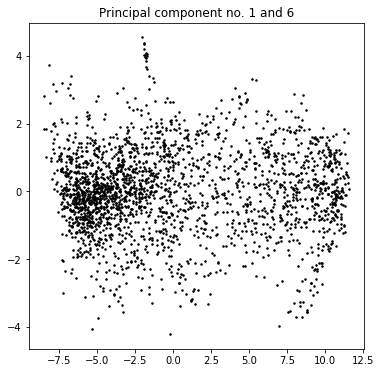

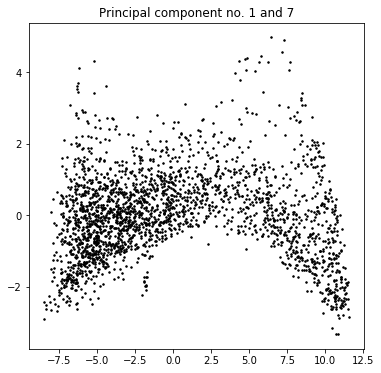

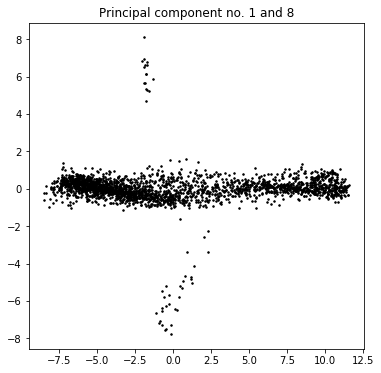

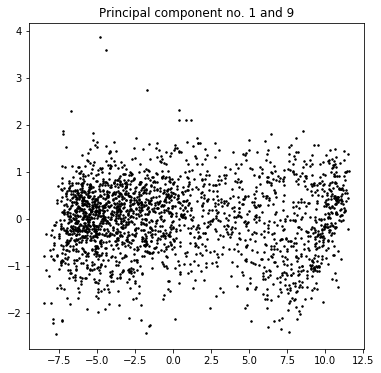

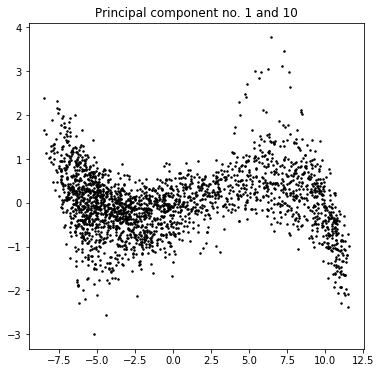

In [22]:
savename = "pc_drive_%d_%d.png"
for i in np.arange(1,10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.plot(H_small[:,0], H_small[:,i], 'k.', ms=3.)
    ax.set_title('Principal component no. 1 and %d' %(i+1) )
    fig.savefig(savename % (blocknumber, i+1))

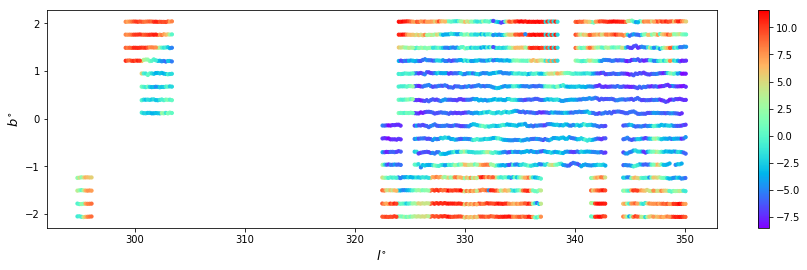

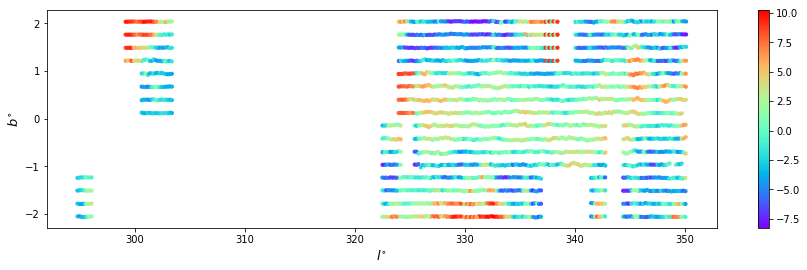

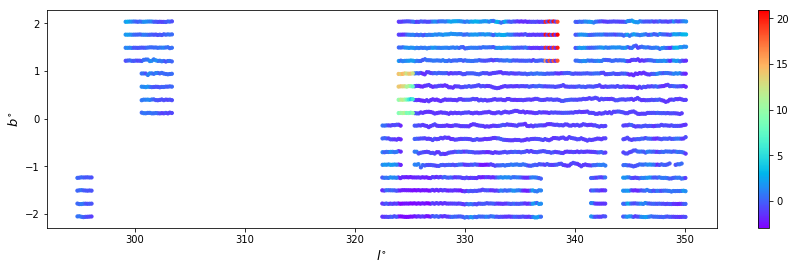

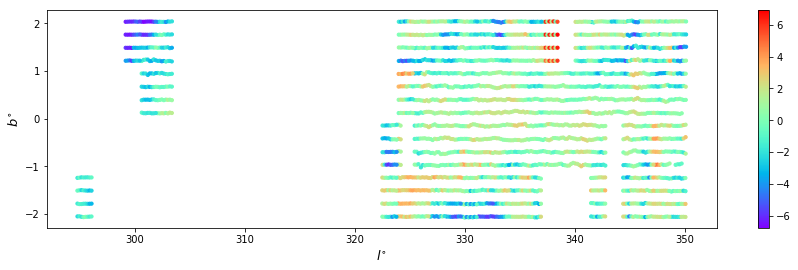

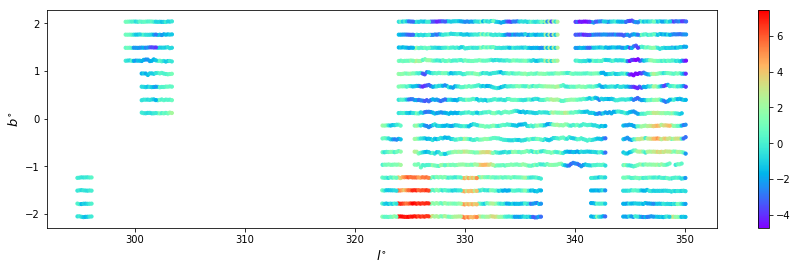

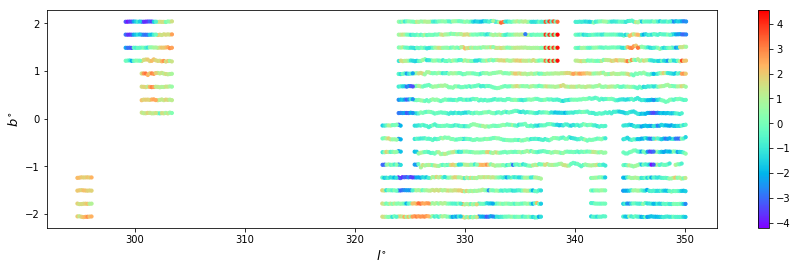

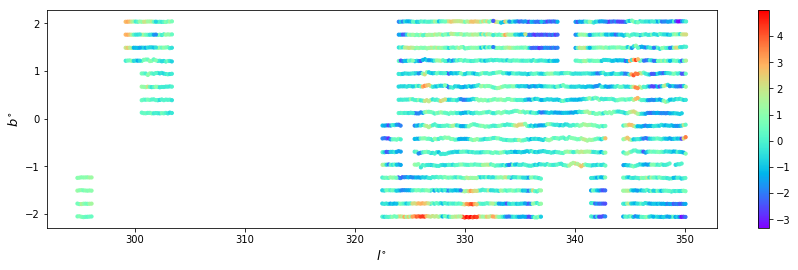

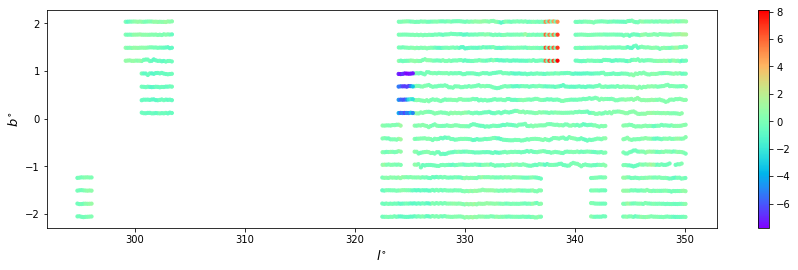

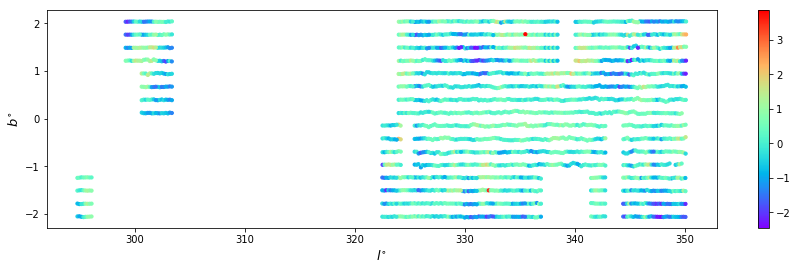

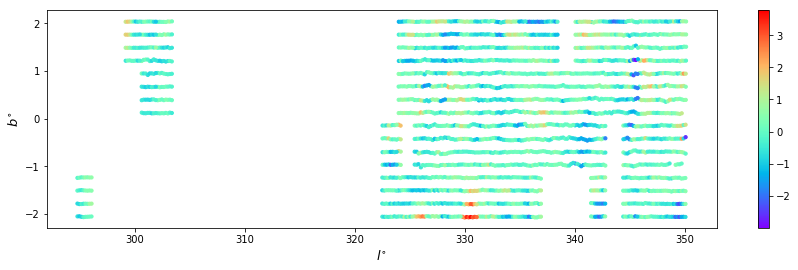

In [25]:
for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,4),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=H_small[:,i], cmap='rainbow', s=10);
    plt.colorbar()
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)
    plt.savefig("PC_galactic_l_b_%d.png" %i)

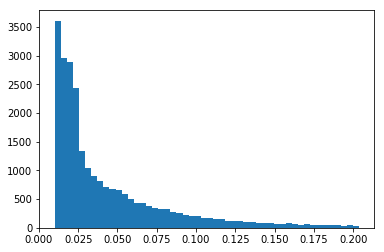

In [28]:
stddev = H_array.std(axis=0)
stddev = stddev[stddev>0.01]
xedges, yedges, patch = plt.hist(stddev, bins=50)